In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 데이터 전처리
def prepare_data(data):
    # 지표를 인덱스로 설정
    df = data.set_index('지표')

    # 데이터를 numeric으로 변환
    data_numeric = df.apply(pd.to_numeric, errors='coerce')

    # 금리 관련 변수 제외 리스트
    exclude_rates = ['국고채1년', '국고채3년', '국고채5년', '국고채10년',
                    '미국채1년', '미국채2년', '미국채3년', '미국채5년']

    return data_numeric.drop(exclude_rates)

# 데이터 로드 및 전처리
data = pd.read_csv('features.csv')
data_numeric = prepare_data(data)

# Plotting for each indicator
indicators = data_numeric.index.tolist()

for indicator in indicators:
    if indicator not in ['시장금리_CD', '시장금리_CP']:
        fig, ax1 = plt.subplots(figsize=(12, 6))

        # 시장금리_CD와 시장금리_CP (왼쪽 y축)
        ax1.plot(data_numeric.columns, data_numeric.loc['시장금리_CD'],
                label='시장금리_CD', color='red', marker='o', alpha=0.7, markersize=2)
        ax1.plot(data_numeric.columns, data_numeric.loc['시장금리_CP'],
                label='시장금리_CP', color='orange', marker='x', alpha=0.7, markersize=2)
        ax1.set_xlabel('연도', fontsize=12)
        ax1.set_ylabel('시장금리 (%)', fontsize=12, color='red')
        ax1.tick_params(axis='y', labelcolor='red')
        ax1.legend(loc='upper left', fontsize=10)

        # x축에 주요 연도만 표시
        ax1.set_xticks(data_numeric.columns[::24])  # 24개월마다 하나씩 표시
        ax1.set_xticklabels([col.split('.')[0] for col in data_numeric.columns[::24]], rotation=45)

        # Indicator (오른쪽 y축)
        ax2 = ax1.twinx()
        ax2.plot(data_numeric.columns, data_numeric.loc[indicator],
                label=indicator, color='blue', linestyle='--', alpha=0.7)
        ax2.set_ylabel(f"{indicator}", fontsize=12, color='blue')
        ax2.tick_params(axis='y', labelcolor='blue')
        ax2.legend(loc='upper right', fontsize=10)

        # Title and layout
        plt.title(f"{indicator}와 시장금리 추이 비교", fontsize=14, pad=20)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()

        # 상관관계 계산
        corr_cd = data_numeric.loc['시장금리_CD'].corr(data_numeric.loc[indicator])
        corr_cp = data_numeric.loc['시장금리_CP'].corr(data_numeric.loc[indicator])

        # 상관관계 텍스트 추가
        plt.figtext(0.02, 0.02,
                   f'상관계수\nCD: {corr_cd:.3f}\nCP: {corr_cp:.3f}',
                   fontsize=10,
                   bbox=dict(facecolor='white', alpha=0.8))

        plt.show()

        print(f"\n{indicator}와의 상관관계:")
        print(f"시장금리_CD: {corr_cd:.4f}")
        print(f"시장금리_CP: {corr_cp:.4f}")
        print("-" * 50)

Output hidden; open in https://colab.research.google.com to view.


[CD/CP 금리와의 상관관계 (금리 변수 제외)]
지표               시장금리_CD   시장금리_CP
지표                                
시장금리_CD         1.000000  0.987156
시장금리_CP         0.987156  1.000000
수출물가지수          0.565426  0.584185
비경제활동인구_30-39세  0.540669  0.499732
비경제활동인구_15-29세  0.537892  0.501514
비경제활동인구_15-19세  0.504545  0.459895
비경제활동인구_20-29세  0.398247  0.401304
경제심리지수_순환변동치    0.319516  0.204538
경제심리지수_원계열      0.289776  0.165949
건설기성액_국내외국기관   -0.130872 -0.160576
건설기성액_공공기관     -0.333635 -0.320267
수입물가지수         -0.338711 -0.304657
비경제활동인구_40-49세 -0.369107 -0.351826
전산업생산지수_건설업    -0.416612 -0.386113
건설기성액_민자       -0.474467 -0.437983
국내건설수주액_단위_백만원 -0.500399 -0.450209
전산업생산지수_공공행정   -0.549824 -0.501704
건설기성액_민간기관     -0.579776 -0.529031
건설기성액_총액       -0.604719 -0.555299
전산업생산지수_서비스업   -0.682317 -0.640522
경기종합지수_후행종합지수  -0.686462 -0.641285
경기종합지수_선행종합지수  -0.696757 -0.652792
소매판매액지수        -0.704793 -0.666243
비경제활동인구_60세이상  -0.705034 -0.656319
소비자물가지수        -0.707131 -0.666890
전산업생산지수_총계     -0.707749 

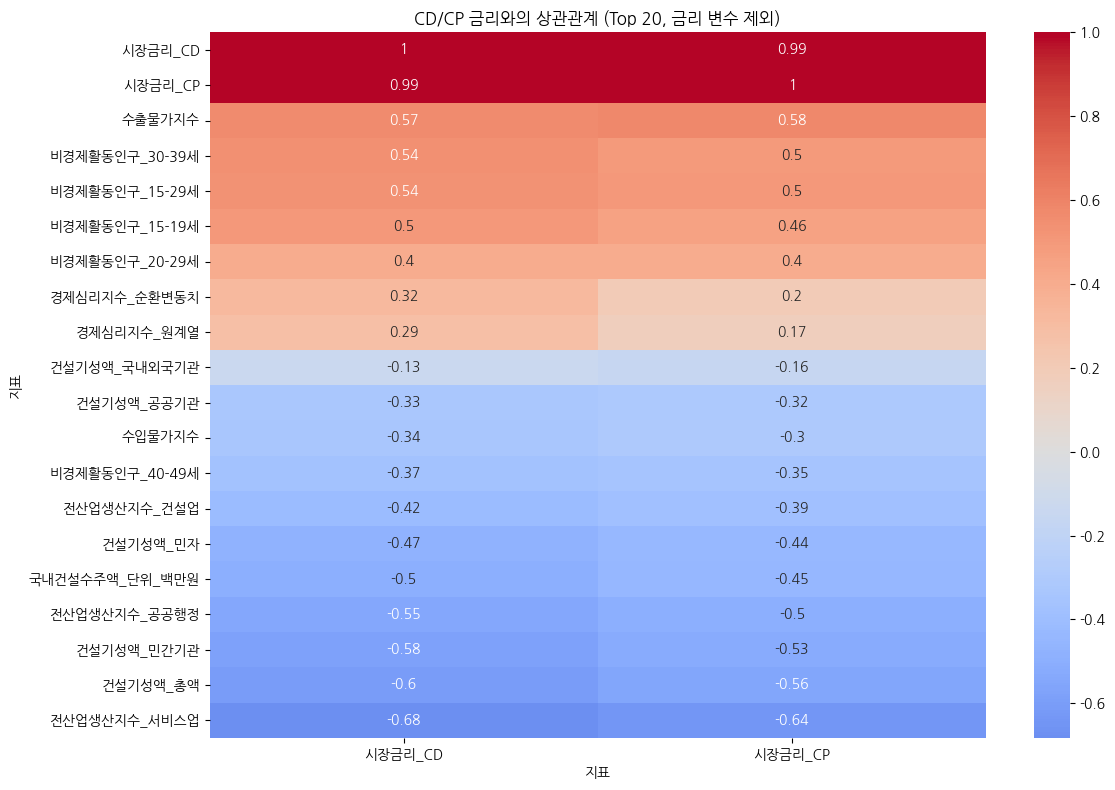



[강한 음의 상관관계 (<-0.6)]
건설기성액_총액: -0.605
전산업생산지수_서비스업: -0.682
경기종합지수_후행종합지수: -0.686
경기종합지수_선행종합지수: -0.697
소매판매액지수: -0.705
비경제활동인구_60세이상: -0.705
소비자물가지수: -0.707
전산업생산지수_총계: -0.708
경기종합지수_동행종합지수: -0.731
전산업생산지수_광공업: -0.742
비경제활동인구_총계: -0.762
비경제활동인구_50-59세: -0.770

[추천 예측 변수]
1. 경제 활동 지표:
- 전산업생산지수_서비스업
- 전산업생산지수_총계
- 전산업생산지수_광공업

2. 경기종합지수:
- 경기종합지수_후행종합지수
- 경기종합지수_선행종합지수
- 경기종합지수_동행종합지수

3. 인구통계 지표:
- 비경제활동인구_60세이상
- 비경제활동인구_총계
- 비경제활동인구_50-59세

4. 물가/소비 지표:
- 소매판매액지수
- 소비자물가지수


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 전처리
def prepare_timeseries_data(data):
    # 지표를 인덱스로 설정
    df = data.set_index('지표')

    # 전치(transpose)하여 시계열 데이터로 변환
    df = df.T

    # 데이터 타입을 float로 변환
    for col in df.columns:
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

    return df

# 데이터 로드 및 전처리
data = pd.read_csv('features.csv')
df = prepare_timeseries_data(data)

# 금리 관련 변수 제외
interest_rates = ['국고채1년', '국고채3년', '국고채5년', '국고채10년',
                 '미국채1년', '미국채2년', '미국채3년', '미국채5년', '미국채10년']
df_no_rates = df.drop(columns=interest_rates)

# CD와 CP 금리의 상관계수 계산
target_vars = ['시장금리_CD', '시장금리_CP']
correlation = df_no_rates.corr()[target_vars].sort_values(by='시장금리_CD', ascending=False)

print("\n[CD/CP 금리와의 상관관계 (금리 변수 제외)]")
print(correlation)

# 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(correlation.iloc[:20], annot=True, cmap='coolwarm', center=0)
plt.title('CD/CP 금리와의 상관관계 (Top 20, 금리 변수 제외)')
plt.tight_layout()
plt.show()

# 강한 상관관계를 가진 변수들 출력
threshold = 0.6
print("\n\n[강한 음의 상관관계 (<-0.6)]")
negative_corr = correlation[correlation['시장금리_CD'] < -threshold].index.tolist()
for var in negative_corr:
    print(f"{var}: {correlation.loc[var, '시장금리_CD']:.3f}")

print("\n[추천 예측 변수]")
print("1. 경제 활동 지표:")
print("- 전산업생산지수_서비스업")
print("- 전산업생산지수_총계")
print("- 전산업생산지수_광공업")
print("\n2. 경기종합지수:")
print("- 경기종합지수_후행종합지수")
print("- 경기종합지수_선행종합지수")
print("- 경기종합지수_동행종합지수")
print("\n3. 인구통계 지표:")
print("- 비경제활동인구_60세이상")
print("- 비경제활동인구_총계")
print("- 비경제활동인구_50-59세")
print("\n4. 물가/소비 지표:")
print("- 소매판매액지수")
print("- 소비자물가지수")


[CD 금리 예측]

학습 세트 모델 성능:
RMSE: 0.0958
MAE: 0.0547
R^2: 0.9966

테스트 세트 모델 성능:
RMSE: 0.7312
MAE: 0.6558
R^2: -22.7015

[CP 금리 예측]

학습 세트 모델 성능:
RMSE: 0.1021
MAE: 0.0513
R^2: 0.9964

테스트 세트 모델 성능:
RMSE: 1.0888
MAE: 0.9739
R^2: -5.1022


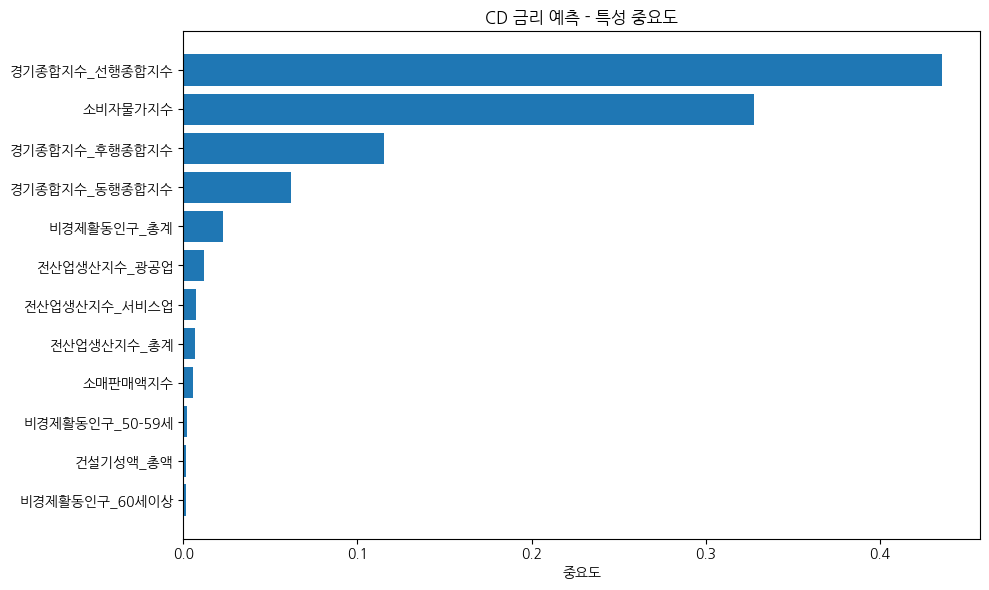

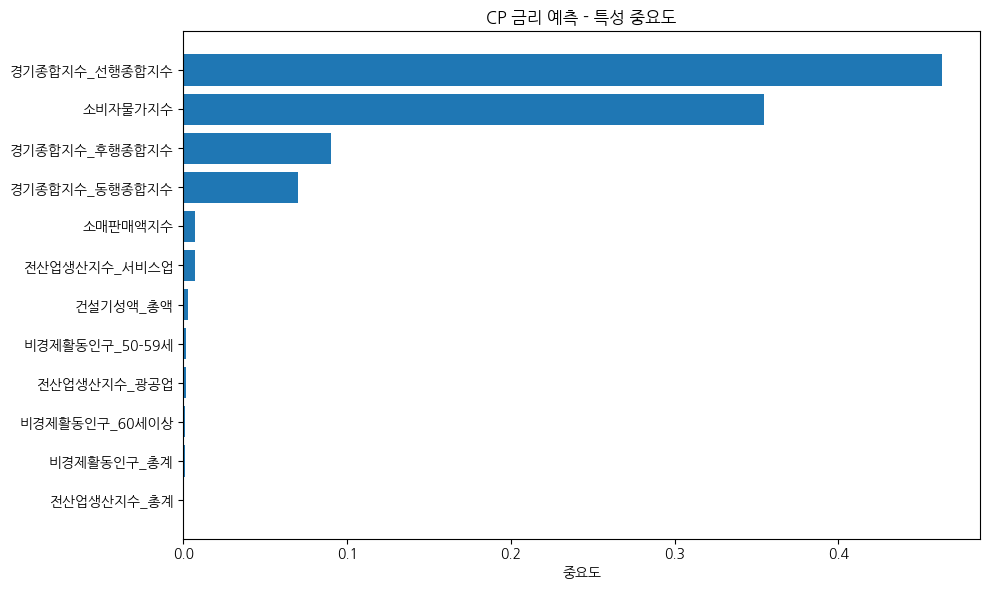

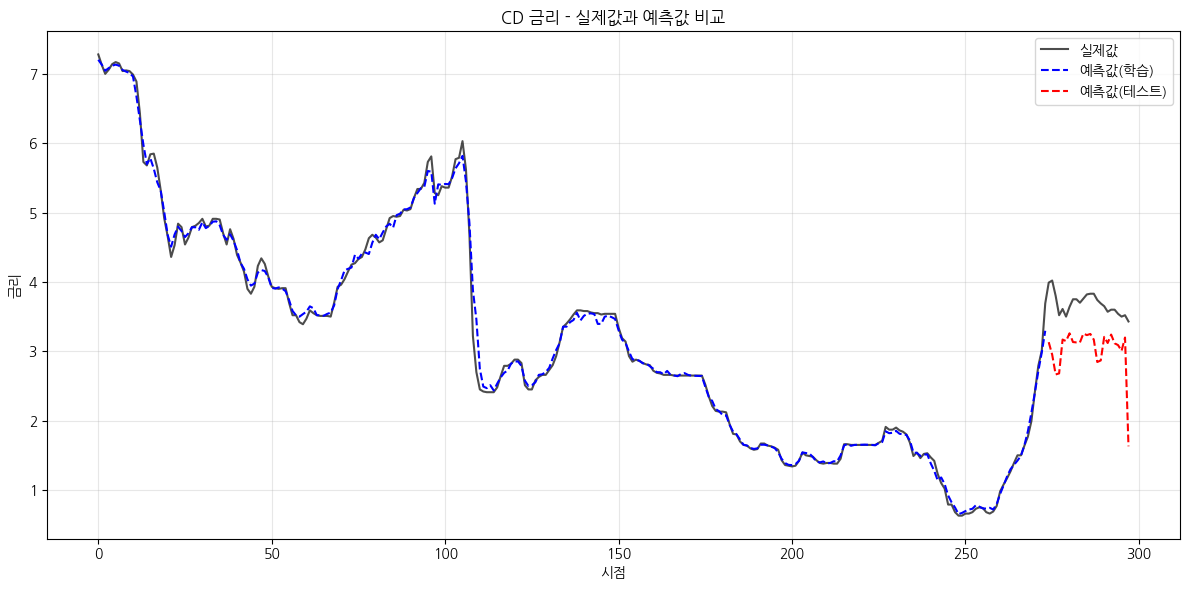

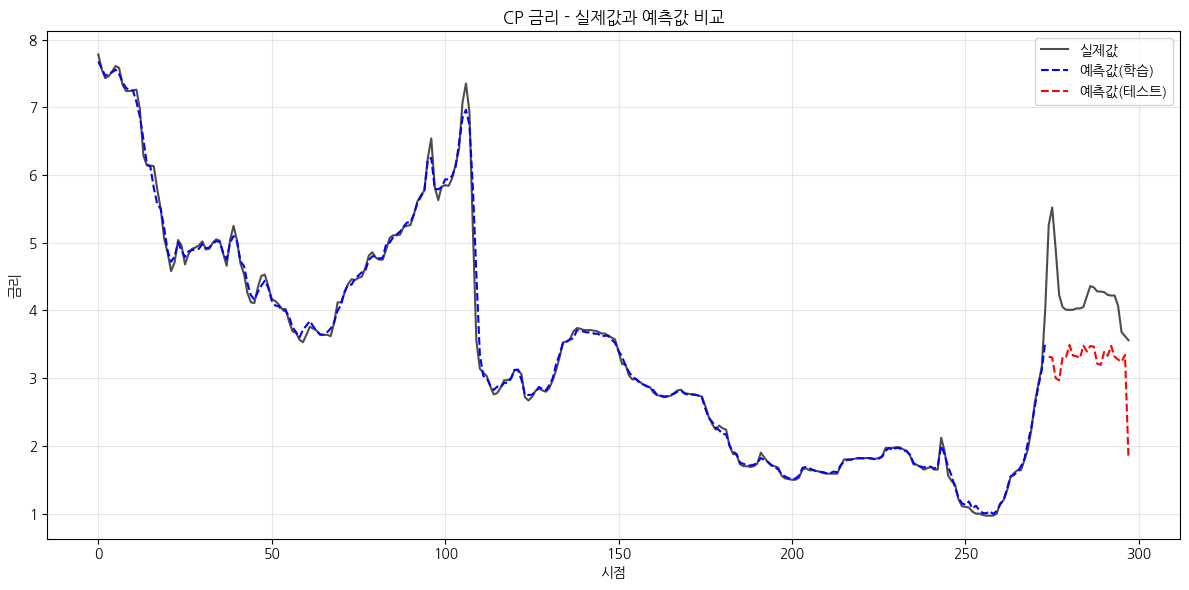

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 특성 변수 리스트
features = [
    '건설기성액_총액',
    '전산업생산지수_서비스업',
    '경기종합지수_후행종합지수',
    '경기종합지수_선행종합지수',
    '소매판매액지수',
    '비경제활동인구_60세이상',
    '소비자물가지수',
    '전산업생산지수_총계',
    '경기종합지수_동행종합지수',
    '전산업생산지수_광공업',
    '비경제활동인구_총계',
    '비경제활동인구_50-59세'
]

# 데이터 전처리
def prepare_data(data):
    # 지표를 인덱스로 설정하고 전치
    df = data.set_index('지표').T

    # 데이터를 numeric으로 변환
    df = df.apply(pd.to_numeric, errors='coerce')

    return df

# 데이터 로드 및 전처리
data = pd.read_csv('features.csv')
df = prepare_data(data)

# X(특성)와 y(타겟) 분리
X = df[features]
y_cd = df['시장금리_CD']
y_cp = df['시장금리_CP']

# 시계열 분할 (최근 24개월을 테스트 세트로 사용)
train_size = len(df) - 24
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_cd_train = y_cd.iloc[:train_size]
y_cd_test = y_cd.iloc[train_size:]
y_cp_train = y_cp.iloc[:train_size]
y_cp_test = cp_test = y_cp.iloc[train_size:]

# RandomForest 모델 학습 (CD)
rf_cd = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cd.fit(X_train, y_cd_train)

# RandomForest 모델 학습 (CP)
rf_cp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cp.fit(X_train, y_cp_train)

# 예측
cd_pred_train = rf_cd.predict(X_train)
cd_pred_test = rf_cd.predict(X_test)
cp_pred_train = rf_cp.predict(X_train)
cp_pred_test = rf_cp.predict(X_test)

# 성능 평가
def evaluate_model(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{name} 모델 성능:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R^2: {r2:.4f}")

    return rmse, mae, r2

# 학습 및 테스트 세트에 대한 성능 평가
print("\n[CD 금리 예측]")
cd_train_metrics = evaluate_model(y_cd_train, cd_pred_train, "학습 세트")
cd_test_metrics = evaluate_model(y_cd_test, cd_pred_test, "테스트 세트")

print("\n[CP 금리 예측]")
cp_train_metrics = evaluate_model(y_cp_train, cp_pred_train, "학습 세트")
cp_test_metrics = evaluate_model(y_cp_test, cp_pred_test, "테스트 세트")

# 특성 중요도 시각화
def plot_feature_importance(model, features, title):
    importances = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(importances['feature'], importances['importance'])
    plt.title(title)
    plt.xlabel('중요도')
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf_cd, features, 'CD 금리 예측 - 특성 중요도')
plot_feature_importance(rf_cp, features, 'CP 금리 예측 - 특성 중요도')

# 실제값과 예측값 비교 그래프
def plot_predictions(y_true, y_pred_train, y_pred_test, title):
    plt.figure(figsize=(12, 6))

    # 학습 데이터 구간
    plt.plot(range(len(y_true)), y_true, label='실제값', color='black', alpha=0.7)
    plt.plot(range(len(y_pred_train)), y_pred_train, label='예측값(학습)', color='blue', linestyle='--')

    # 테스트 데이터 구간
    plt.plot(range(len(y_pred_train), len(y_true)), y_pred_test, label='예측값(테스트)', color='red', linestyle='--')

    plt.title(title)
    plt.xlabel('시점')
    plt.ylabel('금리')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 예측 결과 시각화
plot_predictions(y_cd, cd_pred_train, cd_pred_test, 'CD 금리 - 실제값과 예측값 비교')
plot_predictions(y_cp, cp_pred_train, cp_pred_test, 'CP 금리 - 실제값과 예측값 비교')


=== CD 금리 예측 성능 ===

학습 세트
RMSE: 0.1229
MAE: 0.0808
R2: 0.9916

테스트 세트
RMSE: 0.1108
MAE: 0.1005
R2: 0.1107

=== CP 금리 예측 성능 ===

학습 세트
RMSE: 0.1493
MAE: 0.0872
R2: 0.9890

테스트 세트
RMSE: 0.2923
MAE: 0.2065
R2: -0.5619


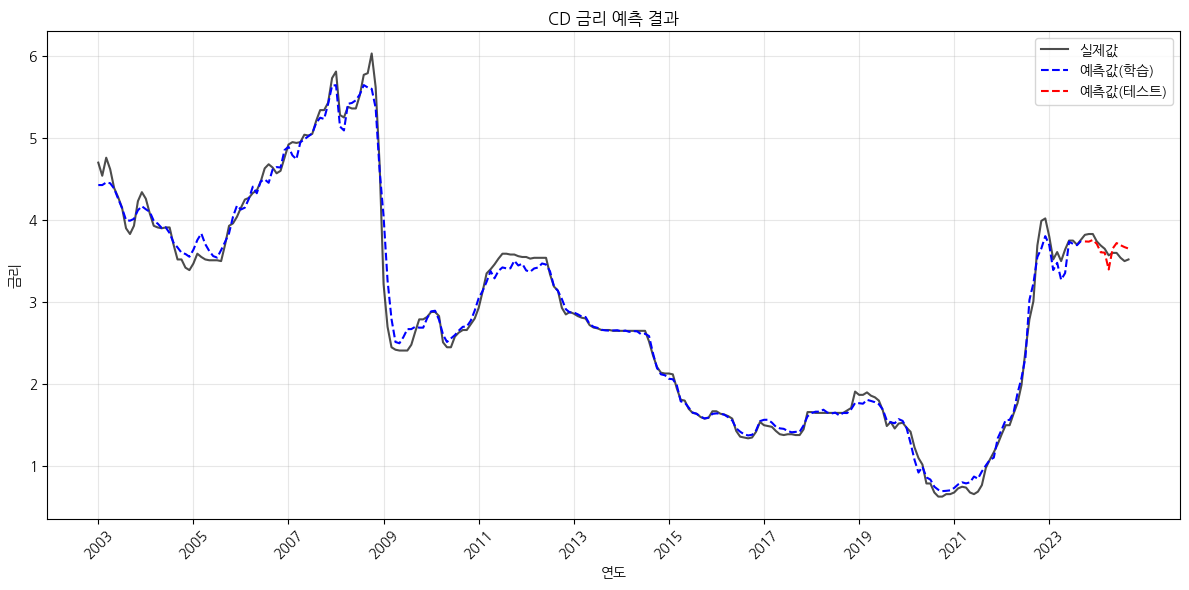

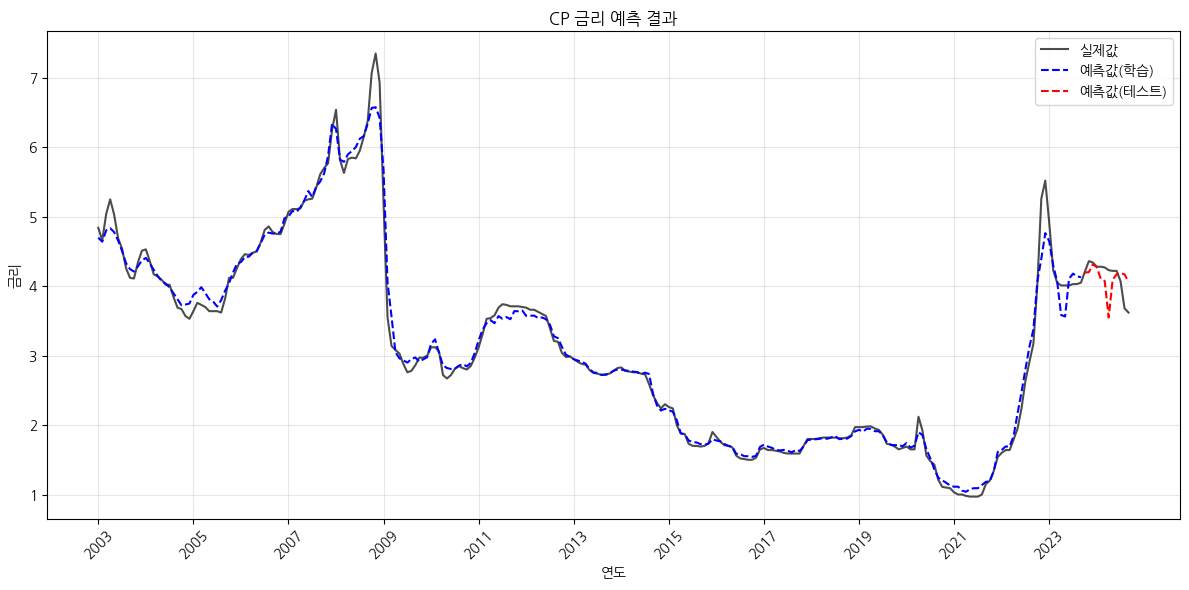

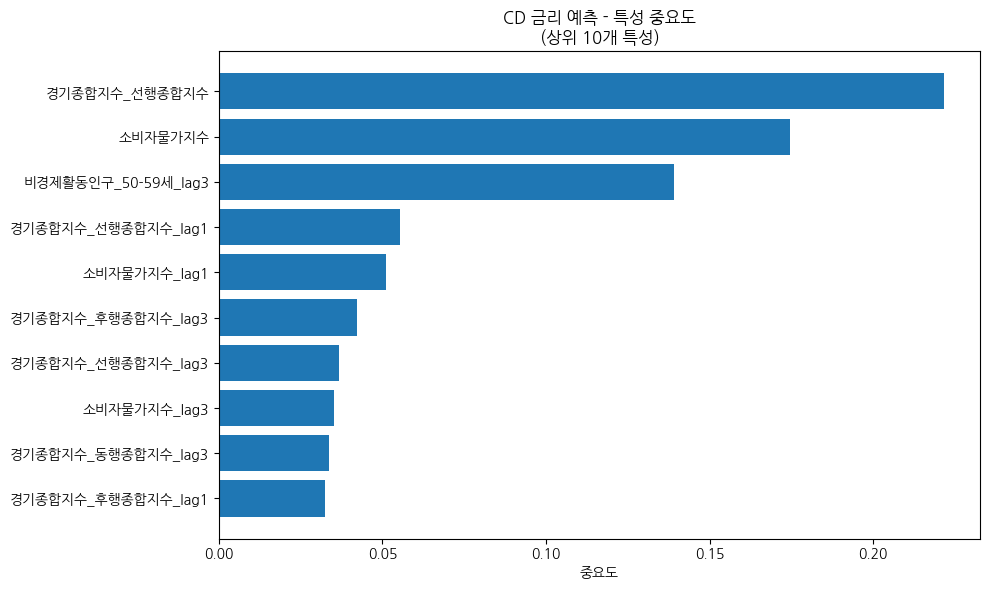

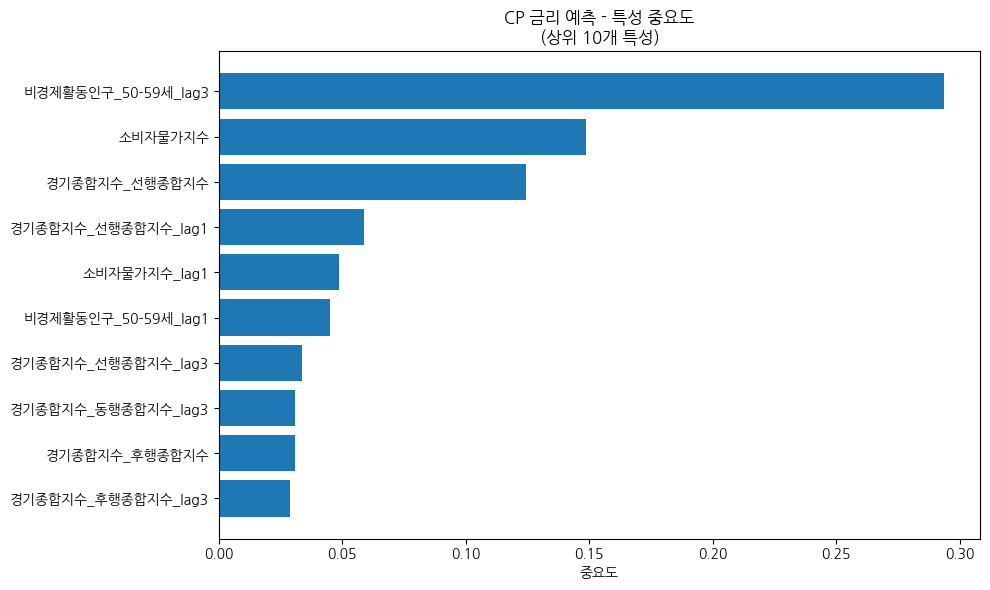


[상위 5개 중요 특성]

CD 금리 예측:
                feature  importance
3         경기종합지수_선행종합지수    0.221546
6               소비자물가지수    0.174686
35  비경제활동인구_50-59세_lag3    0.138987
15   경기종합지수_선행종합지수_lag1    0.055343
18         소비자물가지수_lag1    0.051105

CP 금리 예측:
                feature  importance
35  비경제활동인구_50-59세_lag3    0.293500
6               소비자물가지수    0.148852
3         경기종합지수_선행종합지수    0.124329
15   경기종합지수_선행종합지수_lag1    0.058677
18         소비자물가지수_lag1    0.048650


In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 1. 초기 설정
# 특성 변수 리스트
features = [
    '건설기성액_총액',
    '전산업생산지수_서비스업',
    '경기종합지수_후행종합지수',
    '경기종합지수_선행종합지수',
    '소매판매액지수',
    '비경제활동인구_60세이상',
    '소비자물가지수',
    '전산업생산지수_총계',
    '경기종합지수_동행종합지수',
    '전산업생산지수_광공업',
    '비경제활동인구_총계',
    '비경제활동인구_50-59세'
]

# 2. 데이터 전처리 함수
def prepare_data(data):
    # 지표를 인덱스로 설정하고 전치
    df = data.set_index('지표').T

    # 데이터를 numeric으로 변환
    for col in df.columns:
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

    # lag features 추가
    for feature in features:
        df[f'{feature}_lag1'] = df[feature].shift(1)
        df[f'{feature}_lag3'] = df[feature].shift(3)

    # NA 제거
    df = df.dropna()

    return df

# 3. 성능 평가 함수
def print_metrics(y_true, y_pred, title):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{title}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2: {r2:.4f}")

    return rmse, mae, r2

# 4. 시각화 함수들
def plot_predictions(y_true, y_pred_train, y_pred_test, title):
    plt.figure(figsize=(12, 6))

    # x축 레이블 생성 (연도만)
    dates = pd.to_datetime(y_true.index.str.replace('.', '-') + '-01')
    years = dates.year

    # 전체 실제값
    plt.plot(range(len(y_true)), y_true.values, label='실제값', color='black', alpha=0.7)

    # 학습 구간 예측값
    plt.plot(range(len(y_pred_train)), y_pred_train, label='예측값(학습)', color='blue', linestyle='--')

    # 테스트 구간 예측값
    plt.plot(range(len(y_true)-len(y_pred_test), len(y_true)), y_pred_test,
             label='예측값(테스트)', color='red', linestyle='--')

    # x축 연도 표시
    plt.xticks(range(0, len(y_true), 24), years[::24], rotation=45)

    plt.title(title)
    plt.xlabel('연도')
    plt.ylabel('금리')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_feature_importance(model, feature_columns, title):
    importances = pd.DataFrame({
        'feature': feature_columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=True)

    # 상위 10개만 선택
    top_10 = importances.tail(10)

    plt.figure(figsize=(10, 6))
    plt.barh(top_10['feature'], top_10['importance'])
    plt.title(f'{title}\n(상위 10개 특성)')
    plt.xlabel('중요도')
    plt.tight_layout()
    plt.show()

    return importances

# 5. 메인 실행 코드
def main():
    # 데이터 로드 및 전처리
    data = pd.read_csv('features.csv')
    df = prepare_data(data)

    # X(특성)와 y(타겟) 분리
    feature_columns = features + [f'{feature}_lag1' for feature in features] + [f'{feature}_lag3' for feature in features]
    X = df[feature_columns]
    y_cd = df['시장금리_CD']
    y_cp = df['시장금리_CP']

    # 데이터 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

    # RandomForest 모델 파라미터
    rf_params = {
        'n_estimators': 200,
        'max_depth': 10,
        'min_samples_split': 5,
        'min_samples_leaf': 3,
        'random_state': 42
    }

    # 모델 초기화
    final_rf_cd = RandomForestRegressor(**rf_params)
    final_rf_cp = RandomForestRegressor(**rf_params)

    # 시계열 분할 (최근 12개월을 테스트 세트로 사용)
    test_size = 12  # 24개월에서 12개월로 변경
    train_size = len(df) - test_size

    X_train = X_scaled.iloc[:train_size]
    X_test = X_scaled.iloc[train_size:]
    y_cd_train = y_cd.iloc[:train_size]
    y_cd_test = y_cd.iloc[train_size:]
    y_cp_train = y_cp.iloc[:train_size]
    y_cp_test = y_cp.iloc[train_size:]

    # 모델 학습
    final_rf_cd.fit(X_train, y_cd_train)
    final_rf_cp.fit(X_train, y_cp_train)

    # 예측
    cd_pred_train = final_rf_cd.predict(X_train)
    cd_pred_test = final_rf_cd.predict(X_test)
    cp_pred_train = final_rf_cp.predict(X_train)
    cp_pred_test = final_rf_cp.predict(X_test)

    # 성능 평가
    print("\n=== CD 금리 예측 성능 ===")
    print_metrics(y_cd_train, cd_pred_train, "학습 세트")
    print_metrics(y_cd_test, cd_pred_test, "테스트 세트")

    print("\n=== CP 금리 예측 성능 ===")
    print_metrics(y_cp_train, cp_pred_train, "학습 세트")
    print_metrics(y_cp_test, cp_pred_test, "테스트 세트")

    # 시각화
    plot_predictions(y_cd, cd_pred_train, cd_pred_test, 'CD 금리 예측 결과')
    plot_predictions(y_cp, cp_pred_train, cp_pred_test, 'CP 금리 예측 결과')

    # 특성 중요도 분석
    cd_importances = plot_feature_importance(final_rf_cd, feature_columns, 'CD 금리 예측 - 특성 중요도')
    cp_importances = plot_feature_importance(final_rf_cp, feature_columns, 'CP 금리 예측 - 특성 중요도')

    # 상위 5개 중요 특성 출력
    print("\n[상위 5개 중요 특성]")
    print("\nCD 금리 예측:")
    print(cd_importances.nlargest(5, 'importance'))
    print("\nCP 금리 예측:")
    print(cp_importances.nlargest(5, 'importance'))

if __name__ == "__main__":
    main()


Processing CD 금리...
Processing: 2023.10 (1/12)
Processing: 2023.11 (2/12)
Processing: 2023.12 (3/12)
Processing: 2024.01 (4/12)
Processing: 2024.02 (5/12)
Processing: 2024.03 (6/12)
Processing: 2024.04 (7/12)
Processing: 2024.05 (8/12)
Processing: 2024.06 (9/12)
Processing: 2024.07 (10/12)
Processing: 2024.08 (11/12)
Processing: 2024.09 (12/12)

Processing CP 금리...
Processing: 2023.10 (1/12)
Processing: 2023.11 (2/12)
Processing: 2023.12 (3/12)
Processing: 2024.01 (4/12)
Processing: 2024.02 (5/12)
Processing: 2024.03 (6/12)
Processing: 2024.04 (7/12)
Processing: 2024.05 (8/12)
Processing: 2024.06 (9/12)
Processing: 2024.07 (10/12)
Processing: 2024.08 (11/12)
Processing: 2024.09 (12/12)

=== 롤링 윈도우 예측 성능 ===

CD 금리:

테스트 기간
RMSE: 0.1032
MAE: 0.0883
R2: 0.2280

CP 금리:

테스트 기간
RMSE: 0.2066
MAE: 0.1267
R2: 0.2196


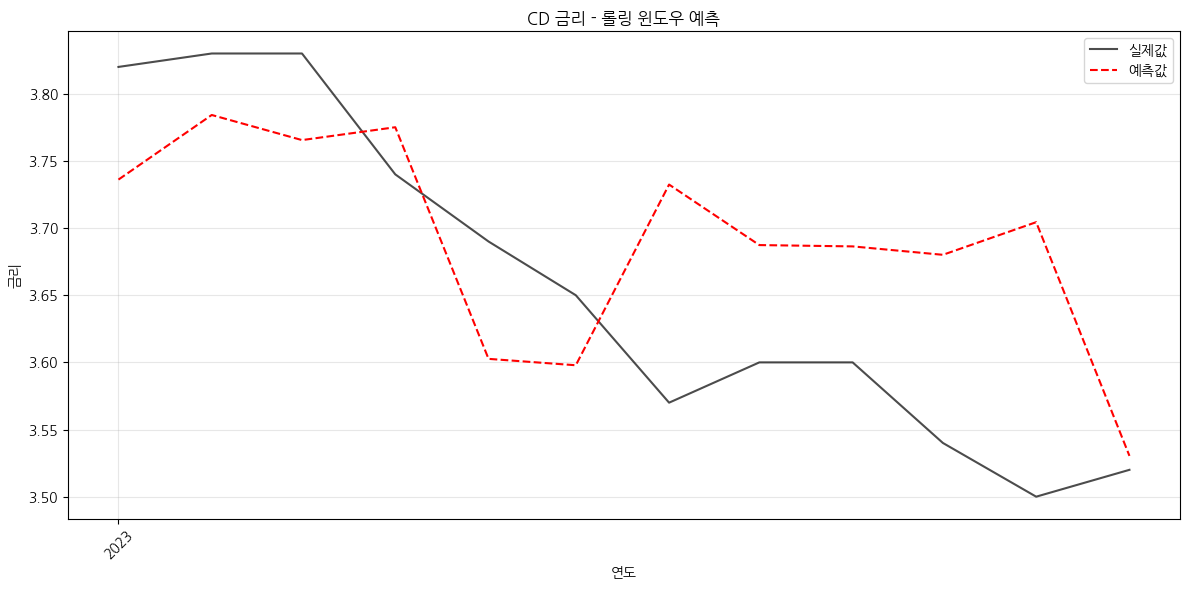

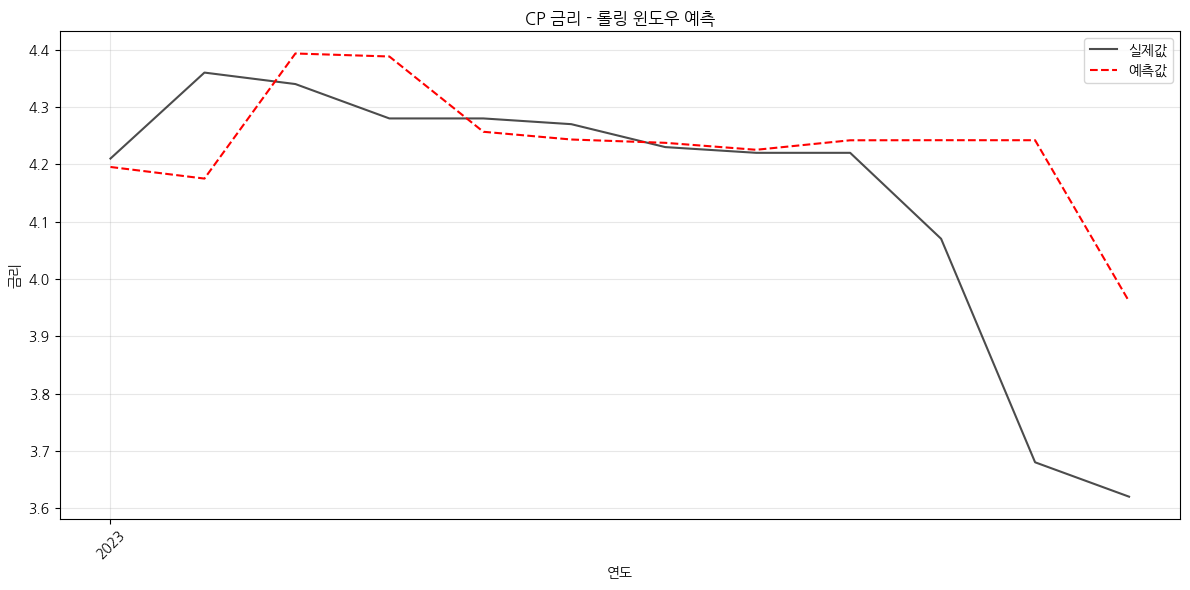

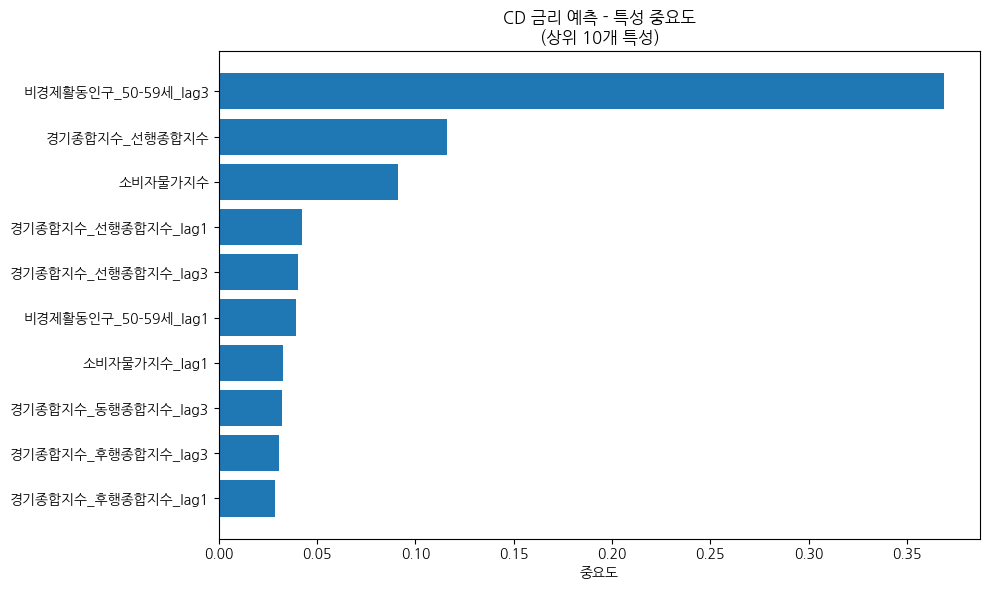

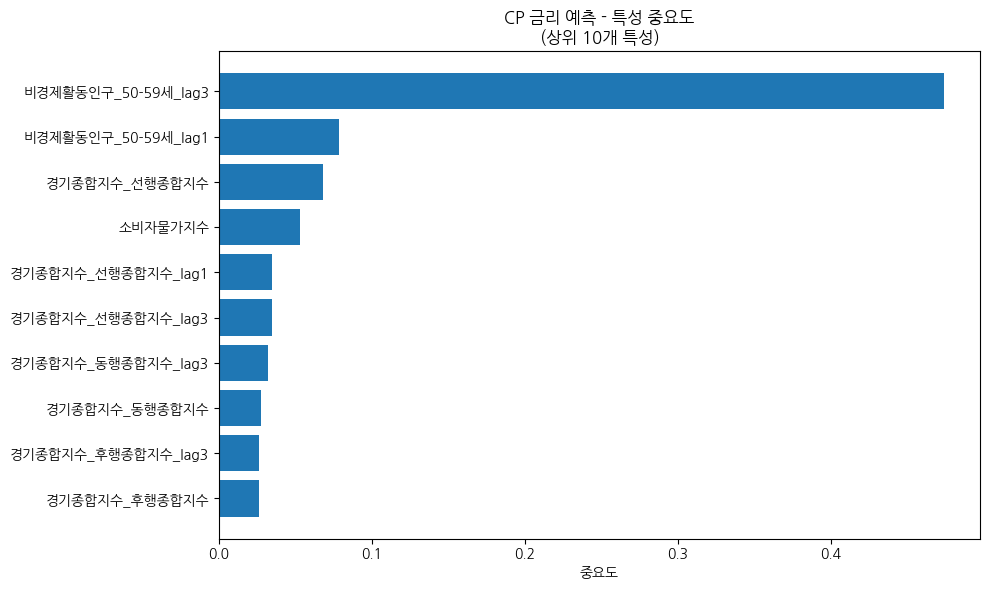


[상위 5개 중요 특성]

CD 금리 예측:
                feature  importance
35  비경제활동인구_50-59세_lag3    0.368801
3         경기종합지수_선행종합지수    0.115965
6               소비자물가지수    0.091332
15   경기종합지수_선행종합지수_lag1    0.042066
27   경기종합지수_선행종합지수_lag3    0.040220

CP 금리 예측:
                feature  importance
35  비경제활동인구_50-59세_lag3    0.473713
23  비경제활동인구_50-59세_lag1    0.078437
3         경기종합지수_선행종합지수    0.068048
6               소비자물가지수    0.053142
15   경기종합지수_선행종합지수_lag1    0.035014


In [31]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 1. 초기 설정
# 특성 변수 리스트
features = [
    '건설기성액_총액',
    '전산업생산지수_서비스업',
    '경기종합지수_후행종합지수',
    '경기종합지수_선행종합지수',
    '소매판매액지수',
    '비경제활동인구_60세이상',
    '소비자물가지수',
    '전산업생산지수_총계',
    '경기종합지수_동행종합지수',
    '전산업생산지수_광공업',
    '비경제활동인구_총계',
    '비경제활동인구_50-59세'
]

# 2. 데이터 전처리 함수
def prepare_data(data):
    # 지표를 인덱스로 설정하고 전치
    df = data.set_index('지표').T

    # 데이터를 numeric으로 변환
    for col in df.columns:
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

    # lag features 추가
    for feature in features:
        df[f'{feature}_lag1'] = df[feature].shift(1)
        df[f'{feature}_lag3'] = df[feature].shift(3)

    # NA 제거
    df = df.dropna()

    return df

# 3. 성능 평가 함수
def print_metrics(y_true, y_pred, title):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{title}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2: {r2:.4f}")

    return rmse, mae, r2

# 4. 시각화 함수
def plot_predictions(dates, y_true, y_pred, title):
    plt.figure(figsize=(12, 6))

    # 실제값과 예측값 플롯
    plt.plot(dates, y_true, label='실제값', color='black', alpha=0.7)
    plt.plot(dates, y_pred, label='예측값', color='red', linestyle='--')

    # x축 연도 표시
    plt.xticks(dates[::24], [d.year for d in dates[::24]], rotation=45)

    plt.title(title)
    plt.xlabel('연도')
    plt.ylabel('금리')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_feature_importance(model, feature_columns, title):
    importances = pd.DataFrame({
        'feature': feature_columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=True)

    top_10 = importances.tail(10)

    plt.figure(figsize=(10, 6))
    plt.barh(top_10['feature'], top_10['importance'])
    plt.title(f'{title}\n(상위 10개 특성)')
    plt.xlabel('중요도')
    plt.tight_layout()
    plt.show()

    return importances

# 5. 롤링 윈도우 예측 함수
def rolling_window_prediction(X, y, window_size=36, test_size=12):
    # 데이터 스케일링을 위한 스케일러
    scaler = StandardScaler()

    # RandomForest 모델 파라미터
    rf_params = {
        'n_estimators': 200,
        'max_depth': 10,
        'min_samples_split': 5,
        'min_samples_leaf': 3,
        'random_state': 42
    }

    # 예측 결과를 저장할 리스트
    predictions = []
    actual_values = []
    dates = []

    # 테스트 기간 시작 인덱스
    test_start = len(X) - test_size

    # 각 시점별로 예측 수행
    for i in range(test_start, len(X)):
        # 윈도우의 시작과 끝 인덱스 계산
        start_idx = max(0, i - window_size)
        end_idx = i

        # 학습 데이터 준비
        X_train = X.iloc[start_idx:end_idx]
        y_train = y.iloc[start_idx:end_idx]

        # 데이터 스케일링
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X.iloc[i:i+1])

        # 모델 학습
        model = RandomForestRegressor(**rf_params)
        model.fit(X_train_scaled, y_train)

        # 예측
        pred = model.predict(X_test_scaled)[0]

        # 결과 저장
        predictions.append(pred)
        actual_values.append(y.iloc[i])
        dates.append(pd.to_datetime(X.index[i].replace('.', '-') + '-01'))

        # 진행상황 출력
        print(f"Processing: {X.index[i]} ({i-test_start+1}/{test_size})")

    return np.array(predictions), np.array(actual_values), np.array(dates)

# 6. 메인 실행 코드
def main():
    # 데이터 로드 및 전처리
    data = pd.read_csv('features.csv')
    df = prepare_data(data)

    # X(특성)와 y(타겟) 분리
    feature_columns = features + [f'{feature}_lag1' for feature in features] + [f'{feature}_lag3' for feature in features]
    X = df[feature_columns]
    y_cd = df['시장금리_CD']
    y_cp = df['시장금리_CP']

    # 롤링 윈도우 예측 수행
    print("\nProcessing CD 금리...")
    cd_pred, cd_actual, dates = rolling_window_prediction(X, y_cd)

    print("\nProcessing CP 금리...")
    cp_pred, cp_actual, dates = rolling_window_prediction(X, y_cp)

    # 성능 평가
    print("\n=== 롤링 윈도우 예측 성능 ===")
    print("\nCD 금리:")
    print_metrics(cd_actual, cd_pred, "테스트 기간")

    print("\nCP 금리:")
    print_metrics(cp_actual, cp_pred, "테스트 기간")

    # 시각화
    plot_predictions(dates, cd_actual, cd_pred, 'CD 금리 - 롤링 윈도우 예측')
    plot_predictions(dates, cp_actual, cp_pred, 'CP 금리 - 롤링 윈도우 예측')

    # 마지막 모델의 특성 중요도 분석을 위한 최종 모델 학습
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    final_model_cd = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
    final_model_cd.fit(X_scaled, y_cd)

    final_model_cp = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
    final_model_cp.fit(X_scaled, y_cp)

    # 특성 중요도 시각화
    cd_importances = plot_feature_importance(final_model_cd, feature_columns, 'CD 금리 예측 - 특성 중요도')
    cp_importances = plot_feature_importance(final_model_cp, feature_columns, 'CP 금리 예측 - 특성 중요도')

    # 상위 5개 중요 특성 출력
    print("\n[상위 5개 중요 특성]")
    print("\nCD 금리 예측:")
    print(cd_importances.nlargest(5, 'importance'))
    print("\nCP 금리 예측:")
    print(cp_importances.nlargest(5, 'importance'))

if __name__ == "__main__":
    main()

In [1]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 49.6 MB/s eta 0:00:00


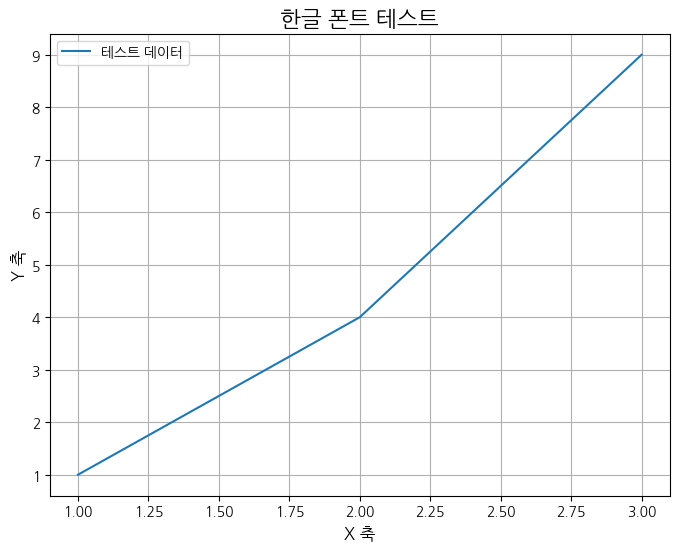

In [2]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 테스트 그래프 출력
plt.figure(figsize=(8, 6))
plt.title("한글 폰트 테스트", fontsize=16)
plt.plot([1, 2, 3], [1, 4, 9], label="테스트 데이터")
plt.xlabel("X 축", fontsize=12)
plt.ylabel("Y 축", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()